Compute the full dynamics induced by a two-body ising coulping Hamiltonian and
compare the result with the dynamics under a pure spin interaction approximation.

In [2]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
import Qsim.operator.spin as spin
import Qsim.operator.phonon as phon
import Qsim.ion_chain.ising.ising_ps as iscp
import Qsim.ion_chain.ising.ising_c as iscc
import Qsim.operator.spin_phonon as sp_op
import Qsim.ion_chain.interaction.spin_phonon as Isp
from  Qsim.ion_chain.ion_system import *
from scipy import signal
import copy

In [3]:
#%%
'''
set parameters of the system
'''    
ion_sys = ions(trap_config={'N': 2, 'fx': 5, 'fz': 0.2}, 
                   numeric_config={'active_spin': [0, 1],'active_phonon': [[0, 1]], 'pcut': [[3,3]]},
                   )
ion_sys.list_para() #print parameters of the system
laser1 = Laser(config = {'Omega_eff':30,'wavevector':1,'Dk':np.sqrt(2)*2*np.pi / (355*10**(-9)),
                         'laser_couple':[0,1], 'mu':100+1e3*ion_sys.fx,'phase':0})
laser1.list_para()
Bz = 0 #Effective magnetic field
N = ion_sys.N

Trap coefficients updated
Anharmonic coefficients updated
_____________________________________________________________
Checking phonon space setup
Phonon space setups are consistent
_____________________________________________________________
Phonon space parameters updated
Cooling parameters updated
Ions class object initialized.
________________________________________________________________
********************Setup of the Trap************************
number of ions 2
Axial COM (Confining) frequency  0.2  [MHz]
Radial COM (Confining) frequency  5 [MHz]
Axial vibrational eigenfrequency [0.2  0.35] MHz
Radial (Transverse) vibrational eigenfrequency [5. 5.] MHz
                                                                 
********************Config of Numeric Calculation************************
index of phonon space included in simulation:  [[0, 1]]
corresonding phonon space cutoff  [[3, 3]]
********************Config of Cooling************************
Effective cooling rate  [2

In [5]:
#%%
'''
simulation for time-depedent Hamiltonian under RWA
'''
#construct Hamiltonian 
Heff,arg0 = iscc.H_ord(Bz,ion_sys,laser1) #construct time-dependent H
#construct initial state (initialized as up up)
spin_config = np.array([0,0])
psi1 = sp_op.ini_state(ion_sys,spin_config,[[0,0]],1)
elist1 = [tensor(spin.sz(N,0),sp_op.p_I(ion_sys)),tensor(spin.sz(N,1),sp_op.p_I(ion_sys))]
#solve time dependent SE
times =  np.arange(0,4,10**(-4))
print('______________________________________________________________________')
print('solving for complete Hamiltonian with rwa')
result1 = sesolve(Heff,psi1,times,e_ops=elist1,args = arg0,progress_bar=True,options=Options(nsteps=1000)) 

______________________________________________________________________
solving for complete Hamiltonian with rwa
10.0%. Run time:   0.99s. Est. time left: 00:00:00:08
20.0%. Run time:   1.98s. Est. time left: 00:00:00:07
30.0%. Run time:   2.99s. Est. time left: 00:00:00:06
40.0%. Run time:   3.99s. Est. time left: 00:00:00:05
50.0%. Run time:   4.99s. Est. time left: 00:00:00:04
60.0%. Run time:   5.99s. Est. time left: 00:00:00:03
70.0%. Run time:   6.98s. Est. time left: 00:00:00:02
80.0%. Run time:   7.98s. Est. time left: 00:00:00:01
90.0%. Run time:   8.97s. Est. time left: 00:00:00:00
Total run time:   9.98s


In [9]:
'''
simulation for complete Hamiltonian after first order power series expansion without RWA
'''
#set blue and red sidebands
laser_b = copy.copy(laser1) #blue sideband
laser_b.phase = -np.pi/2 
laser_r = copy.copy(laser1) #red sideband
laser_r.mu = -laser_b.mu 
laser_r.phase = -np.pi/2
laser_b.list_para()
laser_r.list_para()
#construct Hamiltonian 
arg2 = Isp.H_td_argdic_general(ion0 = ion_sys, laser_list=[laser_r,laser_b])
Heff2 = Isp.H_td_multi_drives(ion0 = ion_sys, laser_list=[laser_r,laser_b],
                              second_order=False, rwa=False) #construct time-dependent H

                                                                 
********************Parameters of Laser Drive************************
Vibrational degree of freedom couples to the laser: Transverse (Radial)
index of ions that couple to the laser field:  [0, 1]
Effective rabi frequency  30  [kHz]
Effective laser frequency  5100.0  [kHz]
Laser phase phis -90.0
(input in rad but displayed in degs)
                                                                 
********************Parameters of Laser Drive************************
Vibrational degree of freedom couples to the laser: Transverse (Radial)
index of ions that couple to the laser field:  [0, 1]
Effective rabi frequency  30  [kHz]
Effective laser frequency  -5100.0  [kHz]
Laser phase phis -90.0
(input in rad but displayed in degs)


In [10]:
#%%
#construct Hamiltonian 
arg2 = Isp.H_td_argdic_general(ion0 = ion_sys, laser_list=[laser_r,laser_b])
Heff2 = Isp.H_td_multi_drives(ion0 = ion_sys, laser_list=[laser_r,laser_b],
                              second_order=False, rwa=False) 
elist1 = [tensor(spin.sz(N,0),sp_op.p_I(ion_sys)),tensor(spin.sz(N,1),sp_op.p_I(ion_sys))]
#solve time dependent SE
print('______________________________________________________________________')
print('solving for complete Hamiltonian without rwa')
result2 = sesolve(Heff2,psi1,times,e_ops=elist1,args = arg2,progress_bar=True,options=Options(nsteps=1000))  

______________________________________________________________________
solving for complete Hamiltonian without rwa
10.0%. Run time:   2.23s. Est. time left: 00:00:00:20
20.0%. Run time:   4.37s. Est. time left: 00:00:00:17
30.0%. Run time:   6.57s. Est. time left: 00:00:00:15
40.0%. Run time:   8.68s. Est. time left: 00:00:00:13
50.0%. Run time:  10.78s. Est. time left: 00:00:00:10
60.0%. Run time:  12.99s. Est. time left: 00:00:00:08
70.0%. Run time:  15.09s. Est. time left: 00:00:00:06
80.0%. Run time:  17.22s. Est. time left: 00:00:00:04
90.0%. Run time:  19.34s. Est. time left: 00:00:00:02
Total run time:  21.51s


In [6]:
#%% 
'''
simulation with a pure spin approximation
'''
psi0 = spin.spin_state(N,[0,0])  
J = iscp.Jt(ion_sys,laser1)
elist2 = [spin.sz(N,0),spin.sz(N,1)]
H = iscp.Hps(J,ion_sys,Bz)
print('______________________________________________________________________')
print('solving for pure spin interaction')
result = mesolve(H,psi0,times,e_ops=elist2,progress_bar=True, options=Options(nsteps=1000))

______________________________________________________________________
solving for pure spin interaction
10.0%. Run time:   0.09s. Est. time left: 00:00:00:00
20.0%. Run time:   0.18s. Est. time left: 00:00:00:00
30.0%. Run time:   0.27s. Est. time left: 00:00:00:00
40.0%. Run time:   0.36s. Est. time left: 00:00:00:00
50.0%. Run time:   0.46s. Est. time left: 00:00:00:00
60.0%. Run time:   0.55s. Est. time left: 00:00:00:00
70.0%. Run time:   0.64s. Est. time left: 00:00:00:00
80.0%. Run time:   0.74s. Est. time left: 00:00:00:00
90.0%. Run time:   0.83s. Est. time left: 00:00:00:00
Total run time:   0.92s


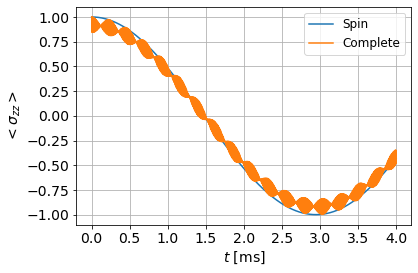

In [15]:
#%%
#plot result, compare time-dependent H under RWA and pure spin H
p0 = 0.5*(result.expect[0]+result.expect[1])
p1 = 0.5*(result1.expect[0]+result1.expect[1])
p2 = 0.5*(result2.expect[0]+result2.expect[1])
plt.plot(times,p0,label = 'Spin')
plt.plot(times,p2,label = 'Complete')
plt.xlabel(r'$t$ [ms]',fontsize = 14)
#title = r'$\delta_{com} = $'+str(ion_sys.delta)+' kHz'
plt.ylabel(r'$<\sigma_{zz}>$',fontsize = 14)
#plt.title(title,fontsize = 14)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.legend(fontsize = 12)
plt.grid()
plt.show()

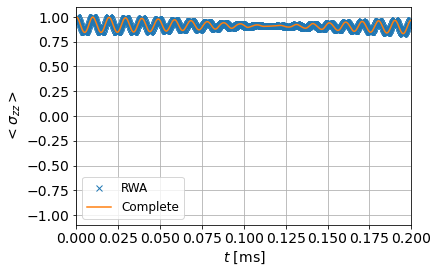

In [12]:
#%% compare results from two time-dependent Hamiltonians
plt.plot(times,p1,'x',label = 'RWA')
plt.plot(times,p2,label = 'Complete')
plt.xlim(0,0.2)
plt.xlabel(r'$t$ [ms]',fontsize = 14)
#title = r'$\delta_{com} = $'+str(ion_sys.delta)+' kHz'
plt.ylabel(r'$<\sigma_{zz}>$',fontsize = 14)
#plt.title(title,fontsize = 14)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.legend(fontsize = 12)
plt.grid()
plt.show()

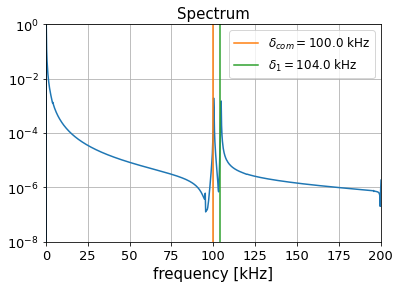

In [17]:
#%% extract frequency of oscillation for the complete evolution
dlist = laser1.detuning(ion_sys)/(2*np.pi)
f, Pxx_den = signal.periodogram(p2, 10000)
plt.semilogy(f, Pxx_den,)
label1 = r'$\delta_{com}=$' + str(np.round(dlist[0])) + ' kHz'
label2 = '$\delta_{1}=$' + str(np.round(dlist[1])) + ' kHz'
plt.plot([dlist[0],dlist[0]],[0,1],label=label1)
plt.plot([dlist[1],dlist[1]],[0,1],label=label2)
#plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [kHz]',fontsize = 15)
#plt.ylabel(r'PSD kHz',fontsize = 15)
plt.title('Spectrum',fontsize = 15)
plt.ylim(10**(-8),1)
plt.xlim(0,200)
plt.yticks(fontsize = 13)
plt.xticks(fontsize = 13)
plt.legend(fontsize = 12)
plt.grid()
plt.show()